# Sinusoidal model
In a first step the transport model is tested.

In a second step the coupled metabolic, sinusoidal unit model.

['[D01__S]',
 '[D02__S]',
 '[D03__S]',
 '[D04__S]',
 '[D05__S]',
 '[PP__S]',
 '[PV__S]',
 '[S01__S]',
 '[S02__S]',
 '[S03__S]',
 '[S04__S]',
 '[S05__S]',
 'time']


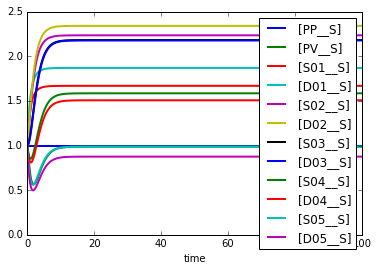

<module 'matplotlib.pyplot' from '/usr/local/lib/python2.7/dist-packages/matplotlib/pyplot.pyc'>

In [26]:
%matplotlib inline
from __future__ import print_function, division
import tellurium as te
from matplotlib import pyplot as plt
import clearance
import os

sbml_path = os.path.join(clearance.target_dir, 'Sinusoid_Clearance_Nc5_v2.xml')

r = te.loads(sbml_path)
r.integrator.absolute_tolerance = 1E-20
r.integrator.variable_step_size = True

# print(r.getAntimony(current=False))
r.timeCourseSelections = ['time'] + ['[{}]'.format(sid) for sid in (r.getBoundarySpeciesIds() + r.getFloatingSpeciesIds()) if '__S' in sid]
import pprint
pprint.pprint(sorted(r.timeCourseSelections))
r.resetToOrigin()
s = r.simulate(0,100)
r.plot(s)

(0, 5)

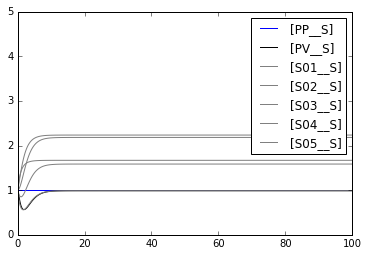

In [27]:
plt.plot(s['time'], s['[PP__S]'], color='blue', label='[PP__S]')
plt.plot(s['time'], s['[PV__S]'], color='black', label='[PV__S]')
for k in range(int(r.Nc)):
    label = '[S{:02}__S]'.format(k+1)
    plt.plot(s['time'], s[label], color='gray', label=label)
plt.legend()
plt.ylim([0,5])

In [28]:
r.getReactionIds()

['F_PPS01_S',
 'F_S01S02_S',
 'F_S02S03_S',
 'F_S03S04_S',
 'F_S04S05_S',
 'F_S05PV_S',
 'F_PVNONE_S',
 'F_PPS01_P',
 'F_S01S02_P',
 'F_S02S03_P',
 'F_S03S04_P',
 'F_S04S05_P',
 'F_S05PV_P',
 'F_PVNONE_P',
 'F_S01D01_S',
 'F_S02D02_S',
 'F_S03D03_S',
 'F_S04D04_S',
 'F_S05D05_S',
 'F_S01D01_P',
 'F_S02D02_P',
 'F_S03D03_P',
 'F_S04D04_P',
 'F_S05D05_P',
 'D_PPS01_S',
 'D_S01S02_S',
 'D_S02S03_S',
 'D_S03S04_S',
 'D_S04S05_S',
 'D_S05PV_S',
 'D_D01D02_S',
 'D_D02D03_S',
 'D_D03D04_S',
 'D_D04D05_S',
 'D_S01D01_S',
 'D_S02D02_S',
 'D_S03D03_S',
 'D_S04D04_S',
 'D_S05D05_S',
 'D_PPS01_P',
 'D_S01S02_P',
 'D_S02S03_P',
 'D_S03S04_P',
 'D_S04S05_P',
 'D_S05PV_P',
 'D_D01D02_P',
 'D_D02D03_P',
 'D_D03D04_P',
 'D_D04D05_P',
 'D_S01D01_P',
 'D_S02D02_P',
 'D_S03D03_P',
 'D_S04D04_P',
 'D_S05D05_P']

In [29]:
Q_ids = [sid for sid in r.getGlobalParameterIds() if '_Q' in sid]
print(Q_ids)
for pid in Q_ids:
    print(pid, '=', r[pid])

['PP_Q', 'PV_Q', 'S01S02_Q', 'S02S03_Q', 'S03S04_Q', 'S04S05_Q']
PP_Q = 2.90812025169e-14
PV_Q = 2.90812025169e-14
S01S02_Q = 1.76077505704e-14
S02S03_Q = 1.2781991721e-14
S03S04_Q = 1.2781991721e-14
S04S05_Q = 1.76077505704e-14


TODO: Necessary to implement some helper tools, to plot flow, pressure and concentration profiles.